In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 200, 'lr': 0.01, 'momentum': 0.3, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 8, 'conv1_kernel_size': 5, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'crop': 200, 'size': 128, 'mean': 0.25, 'std': 0.33}


In [4]:
!ls -l {path}
!rm {path}

-rw-r--r--  1 laurentperrinet  staff  1107977 Jun  5 15:50 _Regard.pt


In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 833 sample images;  667  to train 166 to test
Training model...


	Train Epoch: 1 [0/667 (0%)]	Loss: 1.384443
	Train Epoch: 1 [160/667 (24%)]	Loss: 1.354320
	Train Epoch: 1 [320/667 (48%)]	Loss: 1.392910
	Train Epoch: 1 [480/667 (71%)]	Loss: 1.322464
	Train Epoch: 1 [640/667 (95%)]	Loss: 1.345013
	Train Epoch: 2 [0/667 (0%)]	Loss: 1.267558
	Train Epoch: 2 [160/667 (24%)]	Loss: 1.211829
	Train Epoch: 2 [320/667 (48%)]	Loss: 1.193190
	Train Epoch: 2 [480/667 (71%)]	Loss: 1.243501
	Train Epoch: 2 [640/667 (95%)]	Loss: 1.222097
	Train Epoch: 3 [0/667 (0%)]	Loss: 1.260513
	Train Epoch: 3 [160/667 (24%)]	Loss: 1.253159
	Train Epoch: 3 [320/667 (48%)]	Loss: 1.154218
	Train Epoch: 3 [480/667 (71%)]	Loss: 1.238214
	Train Epoch: 3 [640/667 (95%)]	Loss: 1.399140
	Train Epoch: 4 [0/667 (0%)]	Loss: 1.132775
	Train Epoch: 4 [160/667 (24%)]	Loss: 1.113909
	Train Epoch: 4 [320/667 (48%)]	Loss: 1.157376
	Train Epoch: 4 [480/667 (71%)]	Loss: 1.124444
	Train Epoch: 4 [640/667 (95%)]	Loss: 1.224922
	Train Epoch: 5 [0/667 (0%)]	Loss: 0.983543
	Train Epoch: 5 [160/667 (24

	Train Epoch: 35 [640/667 (95%)]	Loss: 0.000797
	Train Epoch: 36 [0/667 (0%)]	Loss: 0.102435
	Train Epoch: 36 [160/667 (24%)]	Loss: 0.035710
	Train Epoch: 36 [320/667 (48%)]	Loss: 0.002480
	Train Epoch: 36 [480/667 (71%)]	Loss: 0.009255
	Train Epoch: 36 [640/667 (95%)]	Loss: 0.004903
	Train Epoch: 37 [0/667 (0%)]	Loss: 0.010229
	Train Epoch: 37 [160/667 (24%)]	Loss: 0.008438
	Train Epoch: 37 [320/667 (48%)]	Loss: 0.018440
	Train Epoch: 37 [480/667 (71%)]	Loss: 0.003892
	Train Epoch: 37 [640/667 (95%)]	Loss: 0.005703
	Train Epoch: 38 [0/667 (0%)]	Loss: 0.005353
	Train Epoch: 38 [160/667 (24%)]	Loss: 0.018856
	Train Epoch: 38 [320/667 (48%)]	Loss: 0.001399
	Train Epoch: 38 [480/667 (71%)]	Loss: 0.009963
	Train Epoch: 38 [640/667 (95%)]	Loss: 0.010292
	Train Epoch: 39 [0/667 (0%)]	Loss: 0.003064
	Train Epoch: 39 [160/667 (24%)]	Loss: 0.002609
	Train Epoch: 39 [320/667 (48%)]	Loss: 0.000634
	Train Epoch: 39 [480/667 (71%)]	Loss: 0.007169
	Train Epoch: 39 [640/667 (95%)]	Loss: 0.004944
	Tra

	Train Epoch: 70 [320/667 (48%)]	Loss: 0.001232
	Train Epoch: 70 [480/667 (71%)]	Loss: 0.000060
	Train Epoch: 70 [640/667 (95%)]	Loss: 0.001113
	Train Epoch: 71 [0/667 (0%)]	Loss: 0.000803
	Train Epoch: 71 [160/667 (24%)]	Loss: 0.001283
	Train Epoch: 71 [320/667 (48%)]	Loss: 0.000481
	Train Epoch: 71 [480/667 (71%)]	Loss: 0.000413
	Train Epoch: 71 [640/667 (95%)]	Loss: 0.000571
	Train Epoch: 72 [0/667 (0%)]	Loss: 0.007457
	Train Epoch: 72 [160/667 (24%)]	Loss: 0.000256
	Train Epoch: 72 [320/667 (48%)]	Loss: 0.001204
	Train Epoch: 72 [480/667 (71%)]	Loss: 0.016095
	Train Epoch: 72 [640/667 (95%)]	Loss: 0.003258
	Train Epoch: 73 [0/667 (0%)]	Loss: 0.002022
	Train Epoch: 73 [160/667 (24%)]	Loss: 0.000205
	Train Epoch: 73 [320/667 (48%)]	Loss: 0.000578
	Train Epoch: 73 [480/667 (71%)]	Loss: 0.000863
	Train Epoch: 73 [640/667 (95%)]	Loss: 0.007937
	Train Epoch: 74 [0/667 (0%)]	Loss: 0.006402
	Train Epoch: 74 [160/667 (24%)]	Loss: 0.000659
	Train Epoch: 74 [320/667 (48%)]	Loss: 0.001179
	Tra

	Train Epoch: 105 [0/667 (0%)]	Loss: 0.000075
	Train Epoch: 105 [160/667 (24%)]	Loss: 0.000164
	Train Epoch: 105 [320/667 (48%)]	Loss: 0.000576
	Train Epoch: 105 [480/667 (71%)]	Loss: 0.000166
	Train Epoch: 105 [640/667 (95%)]	Loss: 0.000137
	Train Epoch: 106 [0/667 (0%)]	Loss: 0.000337
	Train Epoch: 106 [160/667 (24%)]	Loss: 0.000070
	Train Epoch: 106 [320/667 (48%)]	Loss: 0.000025
	Train Epoch: 106 [480/667 (71%)]	Loss: 0.000355
	Train Epoch: 106 [640/667 (95%)]	Loss: 0.001811
	Train Epoch: 107 [0/667 (0%)]	Loss: 0.000187
	Train Epoch: 107 [160/667 (24%)]	Loss: 0.000111
	Train Epoch: 107 [320/667 (48%)]	Loss: 0.000064
	Train Epoch: 107 [480/667 (71%)]	Loss: 0.000185
	Train Epoch: 107 [640/667 (95%)]	Loss: 0.000434
	Train Epoch: 108 [0/667 (0%)]	Loss: 0.000791
	Train Epoch: 108 [160/667 (24%)]	Loss: 0.001024
	Train Epoch: 108 [320/667 (48%)]	Loss: 0.000143
	Train Epoch: 108 [480/667 (71%)]	Loss: 0.000244
	Train Epoch: 108 [640/667 (95%)]	Loss: 0.000140
	Train Epoch: 109 [0/667 (0%)]	L

	Train Epoch: 139 [0/667 (0%)]	Loss: 0.000085
	Train Epoch: 139 [160/667 (24%)]	Loss: 0.000078
	Train Epoch: 139 [320/667 (48%)]	Loss: 0.000048
	Train Epoch: 139 [480/667 (71%)]	Loss: 0.000636
	Train Epoch: 139 [640/667 (95%)]	Loss: 0.000018
	Train Epoch: 140 [0/667 (0%)]	Loss: 0.000104
	Train Epoch: 140 [160/667 (24%)]	Loss: 0.000184
	Train Epoch: 140 [320/667 (48%)]	Loss: 0.000011
	Train Epoch: 140 [480/667 (71%)]	Loss: 0.000135
	Train Epoch: 140 [640/667 (95%)]	Loss: 0.000050
	Train Epoch: 141 [0/667 (0%)]	Loss: 0.000039
	Train Epoch: 141 [160/667 (24%)]	Loss: 0.000053
	Train Epoch: 141 [320/667 (48%)]	Loss: 0.000241
	Train Epoch: 141 [480/667 (71%)]	Loss: 0.000076
	Train Epoch: 141 [640/667 (95%)]	Loss: 0.000292
	Train Epoch: 142 [0/667 (0%)]	Loss: 0.000054
	Train Epoch: 142 [160/667 (24%)]	Loss: 0.000020
	Train Epoch: 142 [320/667 (48%)]	Loss: 0.000126
	Train Epoch: 142 [480/667 (71%)]	Loss: 0.001690
	Train Epoch: 142 [640/667 (95%)]	Loss: 0.000405
	Train Epoch: 143 [0/667 (0%)]	L

	Train Epoch: 173 [0/667 (0%)]	Loss: 0.000323
	Train Epoch: 173 [160/667 (24%)]	Loss: 0.000240
	Train Epoch: 173 [320/667 (48%)]	Loss: 0.000928
	Train Epoch: 173 [480/667 (71%)]	Loss: 0.000076
	Train Epoch: 173 [640/667 (95%)]	Loss: 0.000086
	Train Epoch: 174 [0/667 (0%)]	Loss: 0.000064
	Train Epoch: 174 [160/667 (24%)]	Loss: 0.000137
	Train Epoch: 174 [320/667 (48%)]	Loss: 0.000055
	Train Epoch: 174 [480/667 (71%)]	Loss: 0.000225
	Train Epoch: 174 [640/667 (95%)]	Loss: 0.000127
	Train Epoch: 175 [0/667 (0%)]	Loss: 0.000067
	Train Epoch: 175 [160/667 (24%)]	Loss: 0.000285
	Train Epoch: 175 [320/667 (48%)]	Loss: 0.000253
	Train Epoch: 175 [480/667 (71%)]	Loss: 0.000004
	Train Epoch: 175 [640/667 (95%)]	Loss: 0.000005
	Train Epoch: 176 [0/667 (0%)]	Loss: 0.000557
	Train Epoch: 176 [160/667 (24%)]	Loss: 0.000333
	Train Epoch: 176 [320/667 (48%)]	Loss: 0.000177
	Train Epoch: 176 [480/667 (71%)]	Loss: 0.000195
	Train Epoch: 176 [640/667 (95%)]	Loss: 0.000005
	Train Epoch: 177 [0/667 (0%)]	L

## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.4293, Accuracy: 158/166 (95%)



In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, ax = ml.show(only_wrong=True)
fig



target:right
pred  :center


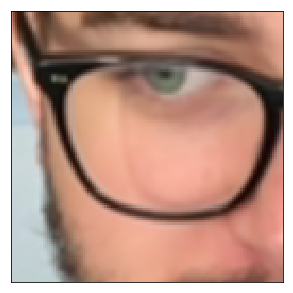

target:right
pred  :center


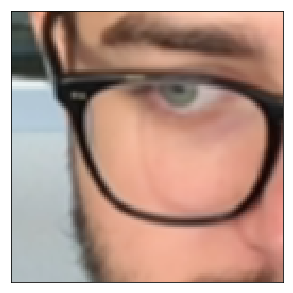

target: left
pred  :center


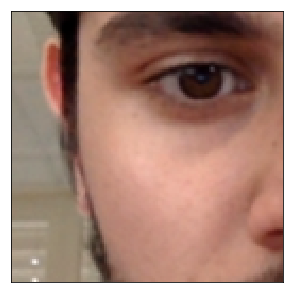

RuntimeError: Interrupted system call at /Users/laurentperrinet/nextcloud/libs/pytorch/torch/lib/libshm/core.cpp:125

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


for data, labels in ml.d.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 

